# Modelos de Regresión Lineal
## Modelo con datos simulados

- y = a + b * x
- X :  100 valores distribuídos según una N(1.5, 2.5)
- Ye = 5 + 1.9 * x
- e estará distribuida según una N(0, 0.8)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = 1.5 + 2.5 * np.random.randn(100)

(array([ 6.,  9.,  6., 10., 20., 19., 19.,  7.,  2.,  2.]),
 array([-4.39724888, -3.17311538, -1.94898187, -0.72484836,  0.49928514,
         1.72341865,  2.94755216,  4.17168566,  5.39581917,  6.61995267,
         7.84408618]),
 <BarContainer object of 10 artists>)

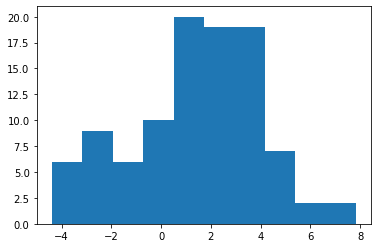

In [4]:
plt.hist(x)

In [5]:
res = 0 + 0.8 * np.random.randn(100)

In [6]:
y_pred = 5 + 1.9 * x

In [7]:
y_act =  5 + 1.9 * x + res

In [8]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [9]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_act": y_act_list,
        "y_pred": y_pred_list
    }
)

In [10]:
data.head()

,x,y_act,y_pred
0,3.272239,12.323839,11.217253
1,0.487538,5.520145,5.926321
2,-2.975337,-0.973568,-0.653140
3,-2.552246,0.303674,0.150733
4,1.031840,7.558183,6.960496


In [38]:
y_mean_vect = [np.mean(y_act)for i in range(1, len(x_list) +  1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

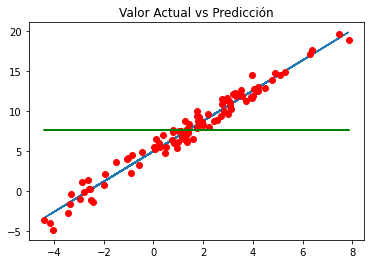

In [39]:
%matplotlib inline

plt.plot(data["x"], data["y_pred"])
plt.plot(data["x"], data["y_act"], "ro")
plt.plot(data["x"], y_mean_vect, "g")
plt.title("Valor Actual vs Predicción")

In [13]:
data["SSR"] = (data["y_pred"] - np.mean(data["y_act"])) ** 2
data["SSD"] = (data["y_pred"] - data["y_act"]) ** 2
data["SST"] = (data["y_act"] - np.mean(data["y_act"])) ** 2

In [14]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST
0,3.272239,12.323839,11.217253,12.322228,1.224532,21.315661
1,0.487538,5.520145,5.926321,3.170640,0.164979,4.782119
2,-2.975337,-0.973568,-0.653140,69.891114,0.102674,75.351403
3,-2.552246,0.303674,0.150733,57.096425,0.023391,54.808507
4,1.031840,7.558183,6.960496,0.557193,0.357229,0.022132


In [15]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [16]:
SSR

2448.198053538857

In [17]:
SSD

74.93219670345651

In [18]:
SST

2554.2418785079512

In [19]:
R2 = SSR/SST
R2

0.9584832486455671

(array([ 3.,  7., 14., 14., 18., 15., 13., 11.,  4.,  1.]),
 array([-1.97948919, -1.56656944, -1.15364969, -0.74072994, -0.32781019,
         0.08510956,  0.49802931,  0.91094906,  1.32386881,  1.73678856,
         2.14970832]),
 <BarContainer object of 10 artists>)

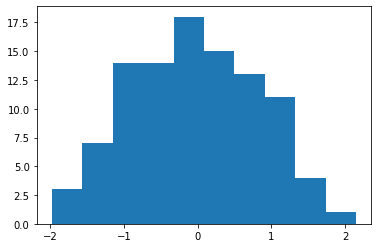

In [20]:
plt.hist(data["y_pred"] - data["y_act"])

## Obteniendo la recta de regresión
- y = a + b * x
- b = sum((x_i) - x_m) * (y_i - y_m)) / sum((x_i - x_m)²)
- a = y_m - b * x_m

In [24]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_act"])
x_mean, y_mean

(1.40156547164009, 7.706950305004569)

In [25]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_act"] - y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [26]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [27]:
alpha = y_mean - beta * x_mean

In [28]:
alpha, beta

(5.026843702083353, 1.9122236221936868)

In [29]:
data["y_model"] = alpha + beta * data["x"]

In [30]:
data.head()

,x,y_act,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.272239,12.323839,11.217253,12.322228,1.224532,21.315661,8.636690,3.499418,11.284096
1,0.487538,5.520145,5.926321,3.170640,0.164979,4.782119,1.998801,0.835447,5.959125
2,-2.975337,-0.973568,-0.653140,69.891114,0.102674,75.351403,37.993783,19.157275,-0.662666
3,-2.552246,0.303674,0.150733,57.096425,0.023391,54.808507,29.271160,15.632625,0.146379
4,1.031840,7.558183,6.960496,0.557193,0.357229,0.022132,0.055003,0.136697,6.999953


In [34]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_act"])**2)
SST = sum((data["y_act"] - y_mean)**2)

In [35]:
SSR, SSD, SST

(2479.6043921225455, 74.63748638540503, 2554.2418785079512)

In [36]:
R2 = SSR/SST
R2

0.9707790060865321

Text(0.5, 1.0, 'Valor Actual vs Predicción')

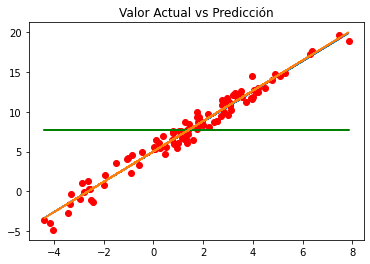

In [40]:
%matplotlib inline

plt.plot(data["x"], data["y_pred"])
plt.plot(data["x"], data["y_act"], "ro")
plt.plot(data["x"], y_mean_vect, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error standar de los residuos (RSE)

In [47]:
RSE = np.sqrt(SSD / (len(data)-2))
RSE

0.872700981970746

In [49]:
y_mean

7.706950305004569

In [50]:
RSE / y_mean

0.11323557924125327